<a href="https://colab.research.google.com/github/haribharadwaj/notebooks/blob/main/CSD2045/Plot_click_ABR_example_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook plots one of 124 real click ABR examples

This is intended for pedagogical purposes. The waveforms can be used for practicing identifiction of stereotypical ABR features. These were measures for high level clicks (~70 dB nHL) with a filter setting of 100 -- 3000 Hz, and click rate of ~11 per second. The measurements were made at the Systems Neuroscience of Auditory Perception lab (SNAPlab), using a Biosemi ActiveII EEG system. Responses from channel Fz referenced against the earlobe ipsilateral to the stimulated ear were extracted by simple averaging across trials.


The first time you run the code, the notebook will download the examples needed from Hari's archives into your virtual colab server space, and plot a randomly selected example. For every following run, because the downloaded examples should still be available until you disconnect from Colab, the code will just choose a different random example and plot.

The code is designed to mark up to 10 most prominent peaks. For example, see if you can answer the following questions:

* Which (if any) of the marked peaks would you identify as wave V of the ABR response?
* Which (if any) of the peaks would you identify as wave I of the ABR response?
* Which (if any) of those peaks would you identify as wave III of the ABR response?


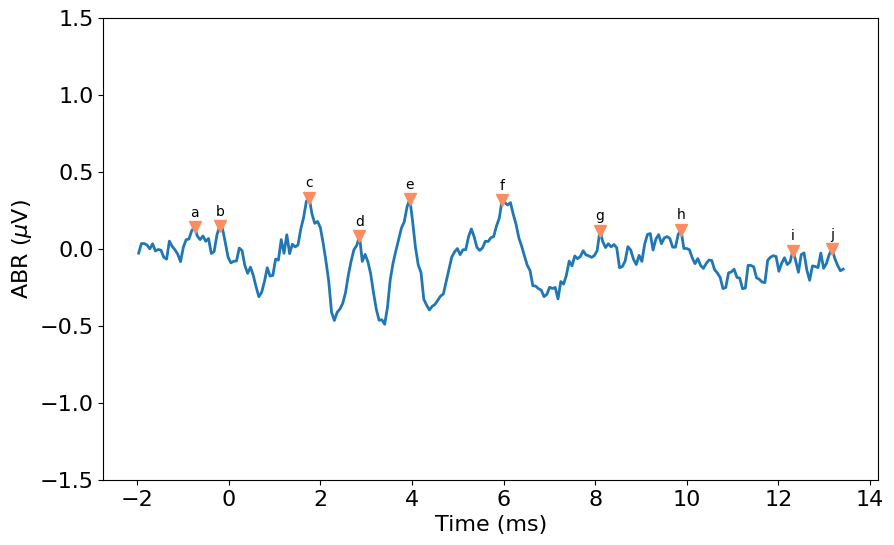

In [2]:
#@title This section plots the ABR waveforms an marks the 10 most prominent peaks (without regard to whether they are standard ABR waves).
import os
from scipy import io
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

file_path = 'AllABR.mat'
url = 'https://www.dropbox.com/scl/fi/k5ttukys5b8nakcslqn9s/AllABR.mat?rlkey=kci513x8oxfm3ntlpc7xqjofp&dl=1'  # URL to download the file if it does not exist

# Check if the file exists
if not os.path.exists(file_path):
    # If the file does not exist, download it using wget
    !wget -O {file_path} {url}



# Load some statistical parameters to generate ABRs from
dat = io.loadmat('AllABR.mat')

x = dat['x'].squeeze()
t = dat['t'].squeeze()


N = x.shape[0]
# Generate a random integer between 0 and N-1
random_index = np.random.randint(0, N)



y = x[random_index,]

# Find peaks that have a prominence of at least some p_threshold
p_threshold = max(abs(y)) * 0.2
peaks, properties = find_peaks(y, prominence=p_threshold)




# Sort peaks by their prominence, highest first, and select the top 10
top_peaks = peaks[np.argsort(properties["prominences"])[-10:]]

# Plot x against t with a horizontally long aspect ratio

width_in = 5
height_in = 2
mpl.rcParams["figure.figsize"] = (width_in, height_in)

col = [252/255., 141/255., 98/255.]  # From colorbrewer
plt.figure(figsize=(10, 6))
plt.plot(t, y, linewidth=2)

# Mark the peaks and label them
for i, peak in enumerate(sorted(top_peaks)):
    plt.plot(t[peak], y[peak], "v", markersize=8, color=col)
    plt.text(t[peak], y[peak] + 0.05, chr(97+i),
             verticalalignment='bottom', horizontalalignment='center')

plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel(r'ABR ($\mu$V)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim([-1.5, 1.5])
plt.show()